# Volume Bar Analysis

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1. Reading Data

In [2]:
from utils import read_bars as read_bars_tmp

def read_bars(csv_file: str)->pd.DataFrame:
    TIME_BEGIN = pd.to_datetime('2020-05-09T00:00:00.000Z')
    TIME_END = pd.to_datetime('2020-05-15T00:00:00.000Z')
    bars_df = read_bars_tmp(csv_file)
    # bars_df = bars_df[(bars_df['timestamp'] >= TIME_BEGIN) & (bars_df['timestamp_end'] < TIME_END)]
    return bars_df

In [3]:
BAR_SIZE = 32  # 4, 8, 16

In [4]:
volume_bars = read_bars(f'/data/bars/VolumeBar/{BAR_SIZE}/VolumeBar.{BAR_SIZE}.OKEx.Swap.BTC_USDT.csv')

In [5]:
volume_bars

,exchange,market_type,pair,bar_type,bar_size,timestamp,timestamp_end,open,high,low,...,volume,volume_sell,volume_buy,volume_quote,volume_quote_sell,volume_quote_buy,count,count_sell,count_buy,vwap
0,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-05-01 00:00:26.594000+00:00,2020-05-01 00:01:14.266000+00:00,8622.099609,8663.299805,8622.099609,...,32.03,7.040000,24.990000,276961.250,60914.863,276954.220,175,31,144,8646.932563
1,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-05-01 00:01:14.753000+00:00,2020-05-01 00:02:06.948000+00:00,8664.000000,8672.200195,8654.900391,...,32.12,15.480001,16.640000,278173.300,134057.580,278157.840,129,71,58,8660.438979
2,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-05-01 00:02:07.172000+00:00,2020-05-01 00:03:37.453000+00:00,8655.900391,8655.900391,8629.000000,...,32.06,15.300000,16.760000,276997.380,132213.190,276982.060,158,80,78,8639.968185
3,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-05-01 00:03:44.362000+00:00,2020-05-01 00:05:09.520000+00:00,8640.500000,8655.000000,8633.200195,...,32.98,11.670000,21.310000,285041.880,100857.270,285030.200,100,44,56,8642.870831
4,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-05-01 00:05:09.588000+00:00,2020-05-01 00:06:49.630000+00:00,8649.299805,8666.799805,8641.700195,...,32.21,16.750000,15.460000,278751.500,144940.520,278734.750,166,72,94,8654.191245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75143,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-06-30 23:34:43.404000+00:00,2020-06-30 23:44:12.715000+00:00,9146.500000,9148.400391,9141.099609,...,33.87,19.180000,14.690000,309762.340,175405.700,309743.160,160,67,93,9145.625627
75144,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-06-30 23:44:12.715000+00:00,2020-06-30 23:49:37.494000+00:00,9147.000000,9152.400391,9145.000000,...,32.25,8.880000,23.369999,295067.530,81255.445,295058.620,121,41,80,9149.380775
75145,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-06-30 23:49:37.531000+00:00,2020-06-30 23:52:28.813000+00:00,9150.299805,9153.700195,9142.400391,...,33.39,17.020000,16.370000,305491.000,155716.750,305473.970,98,44,54,9149.176400
75146,OKEx,Swap,BTC_USDT,VolumeBar,32,2020-06-30 23:52:29.578000+00:00,2020-06-30 23:59:20.023000+00:00,9145.000000,9149.099609,9132.099609,...,32.20,24.620000,7.580000,294303.440,225019.730,294278.840,141,103,38,9139.858385


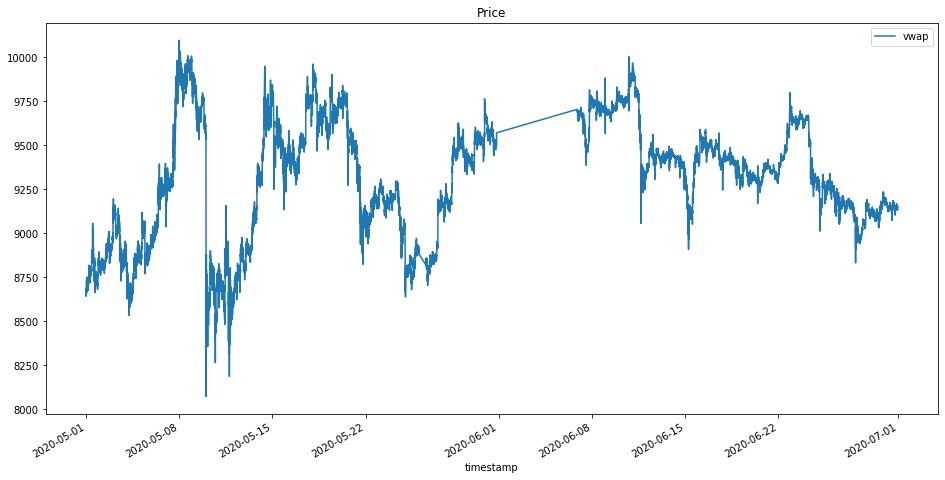

In [6]:
volume_bars.plot.line(x='timestamp', y='vwap', figsize=(16, 8), title='Price')

## 2. Volume Size

In [7]:
volume_sizes = volume_bars['volume']

### 2.1 Remove the last bar

In [8]:
pd.Series.all(volume_sizes[:-1] >= BAR_SIZE)  # except the last bar

True

In [9]:
volume_bars = volume_bars[:-1] # remove last bar because it's less than volume size
volume_sizes = volume_bars['volume']

In [10]:
pd.Series.all(volume_sizes >= BAR_SIZE)

True

### 2.2 Plot histogram of volume sizes

In [11]:
volume_sizes.describe([0.05, 0.5, 0.95, 0.99])

count    75147.000000
mean        33.388146
std          3.228015
min         32.000000
5%          32.010002
50%         32.410000
95%         37.840000
99%         47.090000
max        178.700000
Name: volume, dtype: float64

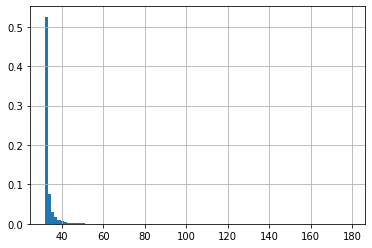

In [12]:
volume_sizes.hist(bins=100, density=True)

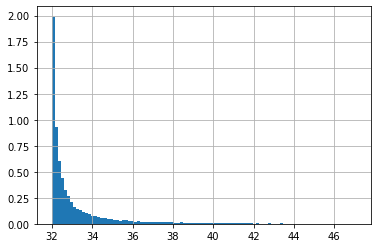

In [13]:
volume_sizes[volume_sizes < volume_sizes.quantile(0.99)].hist(bins=100, density=True)

### 2.3 Filter out bars with too large volume size

In [14]:
volume_bars_filtered = volume_bars[volume_sizes < volume_sizes.quantile(0.99)] # Filter out outliers

In [15]:
volume_bars_filtered['volume'].sum()/volume_bars['volume'].sum()

0.9830548233619179

Only 1.7% trading volume are lost after filtering.

In [16]:
get_duration = lambda df: df['timestamp_end']-df['timestamp']

get_duration(volume_bars_filtered).sum() / get_duration(volume_bars).sum()

0.9956261569344912

Only 0.5% time are lost after filtering.

From the two percentages above, we can safely filter out bars with too large volume size.

In [17]:
volume_bars = volume_bars_filtered # switch

## 3. Duration

In [18]:
duration = (volume_bars['timestamp_end']-volume_bars['timestamp']).apply(lambda x : x.total_seconds())

In [19]:
pd.Series.all(duration >= 0)

True

In [20]:
duration.describe(percentiles=[0.05, 0.9, 0.95, 0.999])

count     74393.000000
mean         69.671970
std        1932.548122
min           0.000000
5%            0.865000
50%          34.495000
90%         155.451600
95%         211.058600
99.9%       646.216232
max      524611.838000
dtype: float64

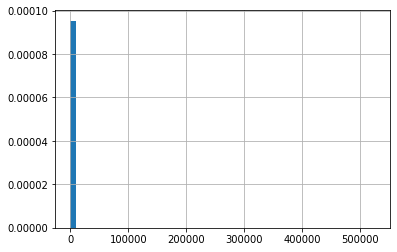

In [21]:
duration.hist(bins=50, density=True)

### 3.1 Filter out invalid bars when crawler is down

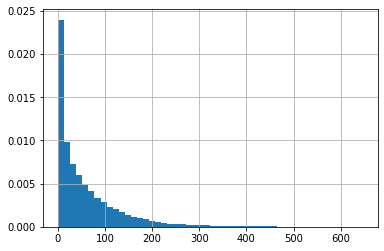

In [22]:
duration[duration < duration.quantile(0.999)].hist(bins=50, density=True)

In [23]:
volume_bars_filtered = volume_bars[duration < duration.quantile(0.999)] # Filter out invalid bars when crawler is down

In [24]:
volume_bars_filtered['volume'].sum()/volume_bars['volume'].sum()

0.9989771268172775

In [25]:
duration[duration < duration.quantile(0.999)].sum() / duration.sum()

0.8770911545544963

By filtering by `duration < duration.quantile(0.999)`, we only lose 0.2% volume, so this filtering is safe.

In [26]:
# switch
volume_bars = volume_bars_filtered
duration = (volume_bars['timestamp_end']-volume_bars['timestamp']).apply(lambda x : x.total_seconds())

### 3.2 Filter out as much volume as possible while keeping as much time as possible

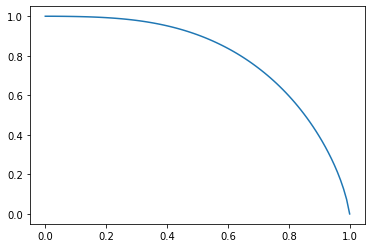

In [27]:
sns.lineplot(
    x=np.linspace(0,1,101),
    y=[duration[duration > duration.quantile(x)].sum() /  duration.sum() for x in np.linspace(0,1,101)]
)

In [28]:
duration[duration > duration.quantile(0.4)].sum() /  duration.sum()

0.9515385267681057

**By filtering out 40% volume bars, we can keep 95.15% time, this is good.**

In [29]:
duration.quantile(0.4)

21.742600000000003

In [30]:
TIME_BEGIN = pd.to_datetime('2020-05-09T00:00:00.000Z')
TIME_END = pd.to_datetime('2020-05-10T00:00:00.000Z')
tmp = volume_bars[['timestamp', 'timestamp_end', 'vwap']].copy()
tmp = tmp[(tmp['timestamp'] >= TIME_BEGIN) & (tmp['timestamp_end'] < TIME_END)]
tmp['color'] = 'blue'
tmp.loc[duration > duration.quantile(0.4), 'color'] = "blue"
tmp.loc[duration <= duration.quantile(0.4), 'color'] = "red"

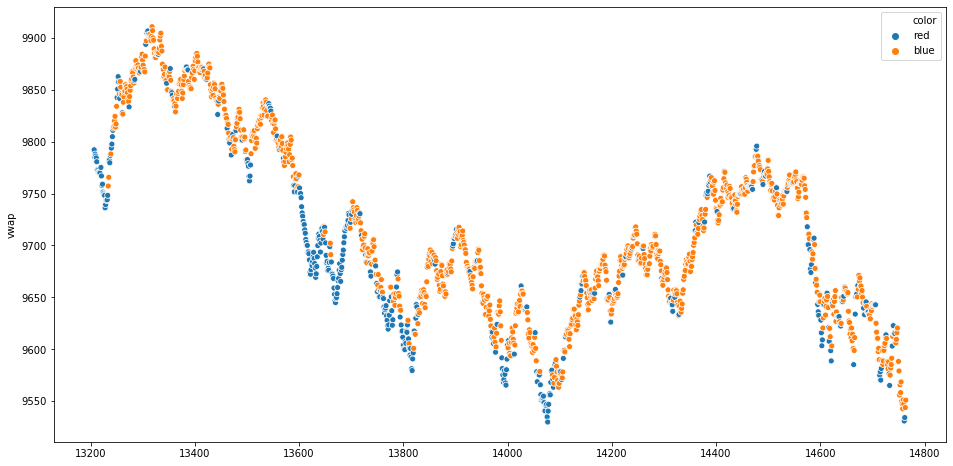

In [31]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=tmp, x=tmp.index, y='vwap', hue='color') # TODO: multicolored line

## 4. Percentage Return

In [32]:
returns = volume_bars['vwap'].pct_change().dropna().rename('return')

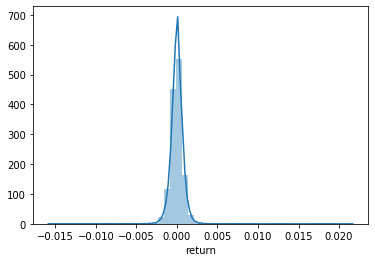

In [33]:
sns.distplot(returns)

In [34]:
OKEX_SWAP_TAKER_FEE = 0.0005
OKEX_SWAP_MAKER_FEE = 0.0002

In [35]:
returns[returns > OKEX_SWAP_MAKER_FEE].size / returns.size

0.36843521670681

In [36]:
returns[returns > OKEX_SWAP_TAKER_FEE].size / returns.size

0.21217218133132393

In [37]:
assert returns[returns > OKEX_SWAP_TAKER_FEE].size / returns.size > 0.1

## 5. VPIN

In [38]:
vpin = (volume_bars['volume_sell'] - volume_bars['volume_buy']).abs() / volume_bars['volume']

In [39]:
vpin.describe([0.05, 0.5, 0.95])

count    74318.000000
mean         0.413667
std          0.283597
min          0.000000
5%           0.034201
50%          0.367752
95%          0.963738
max          1.000000
dtype: float64

In [40]:
assert (vpin[vpin < 1]).size / vpin.size > 0.95

In [41]:
vpin.quantile(0.95)

0.9637383318137843

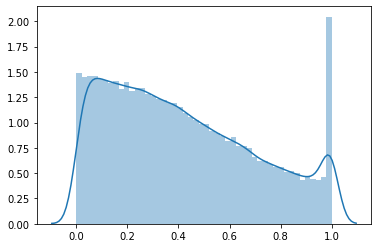

In [42]:
sns.distplot(vpin)

In [43]:
assert duration.corr(vpin) < 0